In [3]:
!pip install statsmodels

     ---------------------------------------- 9.9/9.9 MB 37.2 MB/s eta 0:00:00
     ---------------------------------------- 46.2/46.2 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 233.9/233.9 kB ? eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [30]:
import numpy as np

def rmse(real, prediction):
    return np.sqrt(np.mean((prediction-real)**2))

340
86
426
RMSE: 0.6369627452195212
[2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748 2.64007748
 2.64007748 2.64007748]


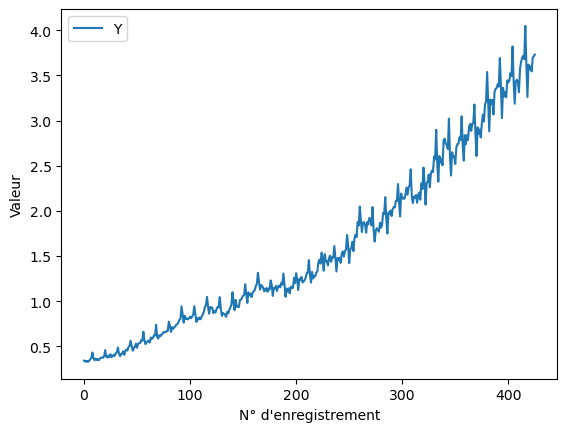

In [31]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

raw_data = pd.read_csv("data/auscafe.csv")

data = raw_data.drop(raw_data.columns[[0]], axis=1)

serie = np.asarray(data['Y'])

ax = data.plot()
ax.set_xlabel("N° d'enregistrement")
ax.set_ylabel("Valeur")


N = len(serie)
train_length = int(N * 0.8)
test_length = N - train_length

train = serie[:train_length]
test = serie[-test_length:]

#train, test = train_test_split(serie, test_size=0.2)

print(len(train))
print(len(test))
print(N)


ses_model = SimpleExpSmoothing(train, initialization_method="heuristic").fit()

prediction = ses_model.forecast(test_length)

print("RMSE:", rmse(test, prediction))

print(prediction)



